# Problema

Problema propune gasirea a celor mai bune modele pentru predictia a patru clase (rase) de caini (Task 1) si a longevitatii acestora (Task 2) pe baza unor feature-uri care sunt atat continue cat si categorice. Pentru predictia claselor se vor incerca modele de clasificare (Logistic Regression, Random Forest si KNN), iar pentru predictia longevitatii se vor incerca modele pentru regresie (Linear Regression, Ridge, Lasso, KNN Regression).

Setul de date contine si valori nule (valori care nu au fost atribuite). Conform analizei de mai jos, exista o singura coloana cu aceasta proprietate. Totodata, setul de date contine si informatii care nu pot influenta rezultatele. Prin urmare se renunta la aceste coloane ("Owner Name").

In [153]:
# imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

# Task 1

# Citirea setului de date

In [154]:
dataset = pd.read_csv("Holteiu_N_Daniel_Ninel_train.csv")

In [155]:
dataset

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Sex,Owner Name
0,Amstaff,27412.4472,46.4779,12.7271,med,high,short,male,Mosley
1,Amstaff,33302.6172,NaN,12.9844,low,med,short,female,Crane
2,Airedale Terrier,19184.9322,57.7801,10.1529,high,high,med,female,Thomas
3,Amstaff,26228.6536,45.6682,13.5366,low,med,med,female,Oliver
4,Daschhund,7720.7755,20.1153,13.8247,high,med,short,male,Williams
5,Airedale Terrier,20379.5337,57.5140,10.2833,high,high,short,male,Hoffman
6,Airedale Terrier,21246.1613,NaN,11.4508,high,high,med,male,Herrera
7,Airedale Terrier,21491.1460,56.7838,12.8966,high,high,med,male,Cardenas
8,Airedale Terrier,21740.7510,NaN,11.4410,high,high,short,female,Johnson
9,Jack Russel Terrier,6820.8519,33.5175,13.6113,high,med,short,female,Campbell


## Encodare Breed Name (Labels)

"Breed Name", pentru task-ul 1 este label-ul. Fiind un sir de caractere acesta va fi encodat cu numere intre 0 si numarul de siruri unice (in cazul de fata 4).

Totodata, pentru task-ul 1 se renunta si la coloana "Longevity(yrs)" intrucat, conform cerintelor, aceasta nu poate fi folosita ca feature pentru acest task.

In [156]:
# Getting the list of all "Breed Names" and encoding them so strings are not used
breed_list = set(dataset['Breed Name'].tolist())
print("Number of unique breed names:", len(breed_list))
breed_encoding = {}
for breed_name, index in zip(breed_list, range(len(breed_list))):
    breed_encoding[breed_name] = index
modified_dataset = dataset
modified_dataset['Breed Name'] = modified_dataset['Breed Name'].map(lambda el: breed_encoding.get(el))
# getting rid of Longevity column 
modified_dataset = modified_dataset.drop('Longevity(yrs)', axis=1)
# Also getting rid of Owner Name (makes no sense for us) - Results don't depend on Owner Name
modified_dataset = modified_dataset.drop('Owner Name', axis=1)

Number of unique breed names: 4


## Renuntarea la datele ce contin valori nule

In [157]:
# Handling Missing Data
print(modified_dataset.isnull().sum())

Breed Name           0
Weight(g)            0
Height(cm)         196
Energy level         0
Attention Needs      0
Coat Lenght          0
Sex                  0
dtype: int64


In [158]:
modified_dataset = modified_dataset.dropna() # drop missing data (data that contain null values)
modified_dataset = modified_dataset.reset_index(drop=True) # Resets indexes for dataset

## Categorical Data

In cazul task-ului 1 (Classification), pe setul de date, s-a observat ca cea mai buna abordare pentru categorical data este de a le encoda sub forma one hot.

Exemplu:
Coloana Energy level: low, med, high -> Se va transforma in 3 coloane: Energy Level_low, Energy Level_med, Energy Level_high care vor avea valori fie 0 fie 1 si doar una din ele va avea valoare 1.

Acesta encodare s-a realizat pentru coloanele: Energy Level, Attention Needs, Coat Lenght, Sex.

In [159]:
# Handling Categorical Data
# The Categorical Data is handled using One Hot Encoder.
# First LabelEncoder (to change from String (categorical) data to number values)
categorical_columns = ["Energy level", "Attention Needs", "Coat Lenght", "Sex"]
for column in categorical_columns:
    label_encoder = LabelEncoder()
    unique_columns = set(dataset[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    modified_dataset[column + "_encoded"] = label_encoder.fit_transform(modified_dataset[column])
    modified_dataset = modified_dataset.drop(column, axis=1) # drop the old collumns

## Distributia Datelor

Vizualizarea distributiei datelor inainte ca acestea sa fie transformate in date de tip One Hot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e3a0a20>,
      dtype=object)

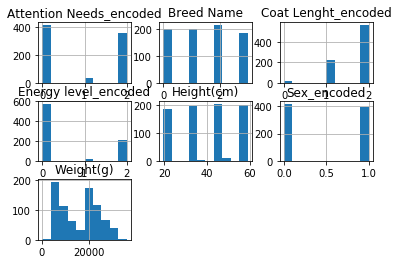

In [160]:
# Vizualizarea Datelor
modified_dataset.hist()

In [161]:
# Handling Categorical Data - continuation
# The Categorical Data is handled using One Hot Encoder.
categorical_columns = ["Energy level", "Attention Needs", "Coat Lenght", "Sex"]
for column in categorical_columns:
    ohe_encoder = OneHotEncoder()
    unique_columns = set(dataset[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    aux = ohe_encoder.fit_transform(modified_dataset[column + "_encoded"].values.reshape(-1, 1)).toarray()
    aux = pd.DataFrame(aux, columns=[column + "_" + unique_columns.get(i) for i in range(aux.shape[1])])
    modified_dataset = pd.concat([modified_dataset, aux], axis=1) # concatenate the new columns to old dataset
    modified_dataset = modified_dataset.drop(column + "_encoded", axis=1) # get rid of old columns

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique 

In [162]:
modified_dataset

,Breed Name,Weight(g),Height(cm),Energy level_high,Energy level_low,Energy level_med,Attention Needs_high,Attention Needs_low,Attention Needs_med,Coat Lenght_short,Coat Lenght_med,Coat Lenght_long,Sex_male,Sex_female
0,2,27412.4472,46.4779,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,19184.9322,57.7801,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,26228.6536,45.6682,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3,7720.7755,20.1153,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,20379.5337,57.5140,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0,21491.1460,56.7838,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,1,6820.8519,33.5175,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,3,14489.3409,20.8370,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,2,27870.3226,46.1721,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,0,18222.0316,56.9236,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Normalization

S-a folosit Min Max Normalizer pentru normalizarea coloanelor "Weight(g)" si "Height(cm)" in intervalul [0, 1].

In [163]:
# Normalization (Just for Weight(g) and Height(cm)). Using Min Max Normalizer
# (X - min(X)) / (max(X) - min(X))
modified_dataset["Weight(g)"] = (modified_dataset["Weight(g)"] - modified_dataset["Weight(g)"].min()) / (modified_dataset["Weight(g)"].max() - modified_dataset["Weight(g)"].min())
modified_dataset["Height(cm)"] = (modified_dataset["Height(cm)"] - modified_dataset["Height(cm)"].min()) / (modified_dataset["Height(cm)"].max() - modified_dataset["Height(cm)"].min())

In [164]:
modified_dataset

,Breed Name,Weight(g),Height(cm),Energy level_high,Energy level_low,Energy level_med,Attention Needs_high,Attention Needs_low,Attention Needs_med,Coat Lenght_short,Coat Lenght_med,Coat Lenght_long,Sex_male,Sex_female
0,2,0.759598,0.684992,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,0.529946,0.971062,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,0.726555,0.664498,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3,0.209950,0.017728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,0.563290,0.964327,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0,0.594318,0.945845,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,1,0.184831,0.356951,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,3,0.398879,0.035995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,2,0.772379,0.677252,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,0,0.503069,0.949383,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Vizualizarea datelor

Au fost plotate cele 4 clase in functie de "Weight(g)" si "Height(cm)"

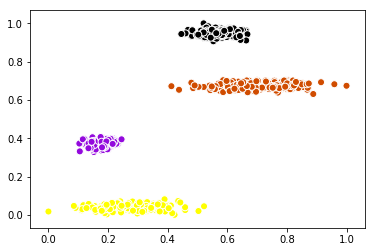

In [165]:
plt.scatter(modified_dataset["Weight(g)"], modified_dataset["Height(cm)"], c=modified_dataset["Breed Name"].values.reshape(-1), s=50,
           cmap="gnuplot",
           edgecolor="white", linewidth=1)

## Impartirea setului de date

Setul de date este impartit in 2 multimi:

X -> Features

y -> Labels

Totodata se va face un random split pe aceste date pentru a avea date de antrenare si date de test

In [166]:
y = modified_dataset["Breed Name"]
X = modified_dataset.drop('Breed Name', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y) # split data into train and set

## Functia plot_decision_boundary

Mai jos este definita functia de plotare a probabilitatii existentei unei clase intr-un anumit punct in functie de model. 

Au fost considerate puncte intre valorile minime si maximne ale datelor continue ("Weight(g)" si "Height(cm)") (adica [0, 1]) si, pentru a putea plota datele, celelalte feature-uri au fost considerate ca fiind valorile majoritare (medii) care se regasesc in datele de test.

Spre exemplu: daca majoritar sexul este male atunci si datele generate vor avea Sex_male = 1 si Sex_female = 0
Definitia functiei de plotare a probabilitatii existentei unei clase intr-un anumit punct in functie de model.

In [167]:
print("Energy Level")
print(x_test["Energy level_low"].mode())
print(x_test["Energy level_med"].mode())
print(x_test["Energy level_high"].mode())
print("Attention Needs")
print(x_test["Attention Needs_low"].mode())
print(x_test["Attention Needs_med"].mode())
print(x_test["Attention Needs_high"].mode())
print("Coat Lenght")
print(x_test["Coat Lenght_short"].mode())
print(x_test["Coat Lenght_med"].mode())
print(x_test["Coat Lenght_long"].mode())
print("Sex")
print(x_test["Sex_male"].mode())
print(x_test["Sex_female"].mode())

Energy Level
0    0.0
dtype: float64
0    0.0
dtype: float64
0    1.0
dtype: float64
Attention Needs
0    0.0
dtype: float64
0    0.0
dtype: float64
0    1.0
dtype: float64
Coat Lenght
0    0.0
dtype: float64
0    0.0
dtype: float64
0    1.0
dtype: float64
Sex
0    1.0
dtype: float64
0    0.0
dtype: float64


In [168]:
def plot_decision_boundary(model, X, y, class_number):
    """
    Use this to plot the decision boundary of a trained model.
    """
    other_features = np.array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]) # majoritare
    X = np.array(X)
    y = np.array(y)
    xx, yy = np.mgrid[X[:,0].min():X[:,0].max():.01, X[:,1].min():X[:,1].max():.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    other_features = np.tile(other_features[np.newaxis,:], (grid.shape[0],1)) # copy the same "other_features" so that there are enough for all generated features above
    grid = np.concatenate((grid, other_features), axis=1) # concatenate them
    probs = model.predict_proba(grid)[:, class_number].reshape(xx.shape)
    f, ax = plt.subplots(figsize=(10, 10))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu")
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = {})$".format(class_number))

    ax.scatter(X[:,0], X[:, 1], c=y, s=50,
             cmap="gnuplot",
             edgecolor="white", linewidth=1)

    ax.set(aspect="auto",
         xlabel="$X_1$", ylabel="$X_2$")

## Alegerea celor mai buni hiperparametrii

Pentru alegerea hiperparametrilor s-a rulat KFold cross validation (cu K=5) pentru modelele din cerinta (LogisticRegression, RandomForestClassifier, KNN) cu diferite valori pentru parametrii si au fost alese modelele cu cele mai bune rezultate.

In [169]:
# KFold cross validation for the models that were given where K = 5
kf = KFold(n_splits=5)

for i, (Model, kwargs) in enumerate([(LogisticRegression, {}),
                                     (LogisticRegression, {"C": 1.0, "solver": 'newton-cg', "multi_class": 'multinomial'}), 
                                     (LogisticRegression, {"C": 2.0, "solver": 'newton-cg', "multi_class": 'multinomial'}),
                                     (LogisticRegression, {"C": 1.0, "solver": 'sag', "multi_class": 'multinomial'}),
                                     (LogisticRegression, {"C": 2.0, "solver": 'sag', "multi_class": 'multinomial'}),
                                     (RandomForestClassifier, {}), 
                                     (RandomForestClassifier, {"n_estimators": 50, "criterion": "entropy"}), 
                                     (RandomForestClassifier, {"n_estimators": 50, "criterion": "gini"}), 
                                     (RandomForestClassifier, {"n_estimators": 100, "criterion": "entropy"}), 
                                     (RandomForestClassifier, {"n_estimators": 100, "criterion": "gini"}), 
                                     (KNeighborsClassifier, {}),
                                     (KNeighborsClassifier, {"n_neighbors": 2, "p": 1}),
                                     (KNeighborsClassifier, {"n_neighbors": 2, "p": 2}),
                                     (KNeighborsClassifier, {"n_neighbors": 3, "p": 1}),
                                     (KNeighborsClassifier, {"n_neighbors": 3, "p": 2}),
                                     (KNeighborsClassifier, {"n_neighbors": 4, "p": 1}),
                                     (KNeighborsClassifier, {"n_neighbors": 4, "p": 2}),
                                     (KNeighborsClassifier, {"n_neighbors": 5, "p": 1}),
                                     (KNeighborsClassifier, {"n_neighbors": 5, "p": 2}),
                                    ]):
    accuracies = []
    precisions = []
    f1_scores = []
    print(Model.__name__, kwargs)
    for k, (train_index, test_index) in enumerate(kf.split(x_train)):
        xx_train = x_train.iloc[train_index]
        yy_train = y_train.iloc[train_index]

        xx_validation = x_train.iloc[test_index]
        yy_validation = y_train.iloc[test_index]

        model = Model(**kwargs)
        model.fit(xx_train, yy_train)
        
        accuracy = accuracy_score(yy_validation, model.predict(xx_validation))
        precision = precision_score(yy_validation, model.predict(xx_validation), average="weighted")
        f1 = f1_score(yy_validation, model.predict(xx_validation), average="weighted")
        accuracies.append(accuracy)
        precisions.append(precision)
        f1_scores.append(f1)
        print("split", k, "accuracy", accuracy, "precision", precision, "f1_score", f1)
    print("Average accuracy:", np.average(accuracies))
    print("Average precision:", np.average(precisions))
    print("Average f1 score:", np.average(f1_scores))
    print("--------------------------------------------------------------------------------------------------------")
    print()

LogisticRegression {}
split 0 accuracy 0.9504132231404959 precision 0.9532296598412301 f1_score 0.9497597349397199
split 1 accuracy 0.9834710743801653 precision 0.9845374566782191 f1_score 0.9835290706104103
split 2 accuracy 0.9834710743801653 precision 0.9843410178338409 f1_score 0.9835400691663074
split 3 accuracy 0.9916666666666667 precision 0.9919871794871795 f1_score 0.9916861769583456
split 4 accuracy 0.9583333333333334 precision 0.96484375 f1_score 0.9592342690239142
Average accuracy: 0.9734710743801653
Average precision: 0.9757878127680939
Average f1 score: 0.9735498641397395
--------------------------------------------------------------------------------------------------------

LogisticRegression {'C': 1.0, 'solver': 'newton-cg', 'multi_class': 'multinomial'}
split 0 accuracy 0.9752066115702479 precision 0.9765262285923444 f1_score 0.9750364469913402
split 1 accuracy 0.9834710743801653 precision 0.9845374566782191 f1_score 0.9835290706104103
split 2 accuracy 0.983471074380165

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_c

split 1 accuracy 0.9834710743801653 precision 0.9845374566782191 f1_score 0.9835290706104103
split 2 accuracy 0.9917355371900827 precision 0.9919589010498102 f1_score 0.9917221052793166
split 3 accuracy 0.9916666666666667 precision 0.9919871794871795 f1_score 0.9916861769583456
split 4 accuracy 0.975 precision 0.9774999999999999 f1_score 0.9752786964703198
Average accuracy: 0.9883746556473829
Average precision: 0.9891967074430419
Average f1 score: 0.9884432098636784
--------------------------------------------------------------------------------------------------------

LogisticRegression {'C': 1.0, 'solver': 'sag', 'multi_class': 'multinomial'}
split 0 accuracy 0.9752066115702479 precision 0.9765262285923444 f1_score 0.9750364469913402
split 1 accuracy 0.9834710743801653 precision 0.9845374566782191 f1_score 0.9835290706104103
split 2 accuracy 0.9834710743801653 precision 0.9843410178338409 f1_score 0.9835400691663074
split 3 accuracy 0.9916666666666667 precision 0.9919871794871795 f1

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:2

split 1 accuracy 1.0 precision 1.0 f1_score 1.0
split 2 accuracy 1.0 precision 1.0 f1_score 1.0
split 3 accuracy 1.0 precision 1.0 f1_score 1.0
split 4 accuracy 0.975 precision 0.9761494252873564 f1_score 0.9751603172494083
Average accuracy: 0.9949999999999999
Average precision: 0.9952298850574713
Average f1 score: 0.9950320634498816
--------------------------------------------------------------------------------------------------------

RandomForestClassifier {'n_estimators': 50, 'criterion': 'gini'}
split 0 accuracy 1.0 precision 1.0 f1_score 1.0
split 1 accuracy 0.9917355371900827 precision 0.9920110192837466 f1_score 0.9917519096675841
split 2 accuracy 1.0 precision 1.0 f1_score 1.0
split 3 accuracy 1.0 precision 1.0 f1_score 1.0
split 4 accuracy 0.9916666666666667 precision 0.9919642857142856 f1_score 0.9916718027734976
Average accuracy: 0.99668044077135
Average precision: 0.9967950609996065
Average f1 score: 0.9966847424882165
-----------------------------------------------------

In [447]:
best_models = [
    (LogisticRegression, {"C": 2.0, "solver": 'sag', "multi_class": 'multinomial'}),
    (RandomForestClassifier, {'n_estimators': 100, 'criterion': 'gini'}), 
    (KNeighborsClassifier, {"n_neighbors": 2, "p": 2})
]

In [448]:
# Using the found parameters, train on everything and test on the test set.
for i, (Model, kwargs) in enumerate(best_models):
    model = Model(**kwargs)
    model.fit(x_train, y_train)
  
    test_accuracy = accuracy_score(model.predict(x_test), y_test)
    test_precision = precision_score(y_test, model.predict(x_test), average="weighted")
    test_f1 = f1_score(y_test, model.predict(x_test), average="weighted")
    print(Model.__name__)
    print()
    print("test accuracy", test_accuracy)
    print("test precision", test_precision)
    print("test f1_score", f1)
    print("------------------------------------")

LogisticRegression

test accuracy 0.9900497512437811
test precision 0.9904731660844712
test f1_score 0.9418318318318318
------------------------------------
RandomForestClassifier

test accuracy 1.0
test precision 1.0
test f1_score 0.9418318318318318
------------------------------------
KNeighborsClassifier

test accuracy 0.9701492537313433
test precision 0.9710820895522388
test f1_score 0.9418318318318318
------------------------------------


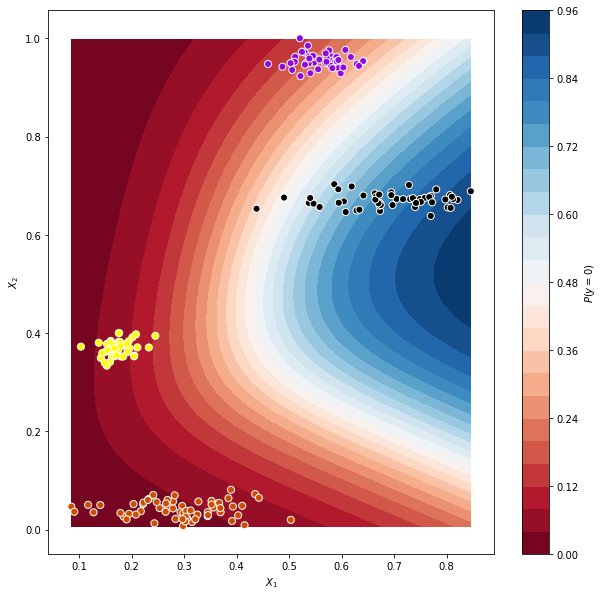

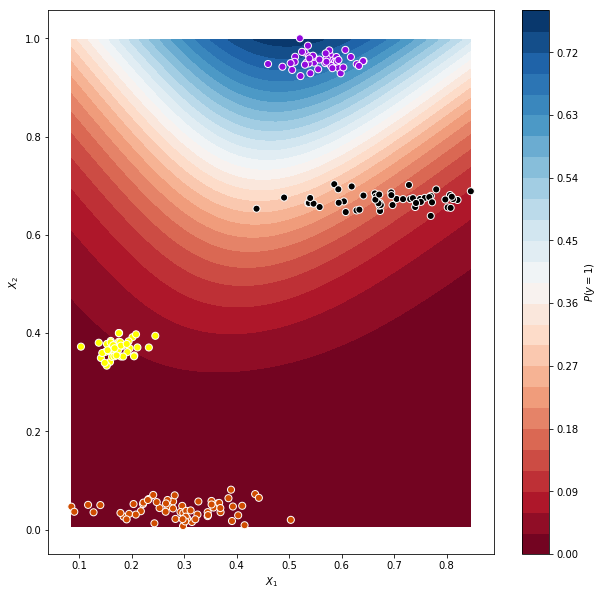

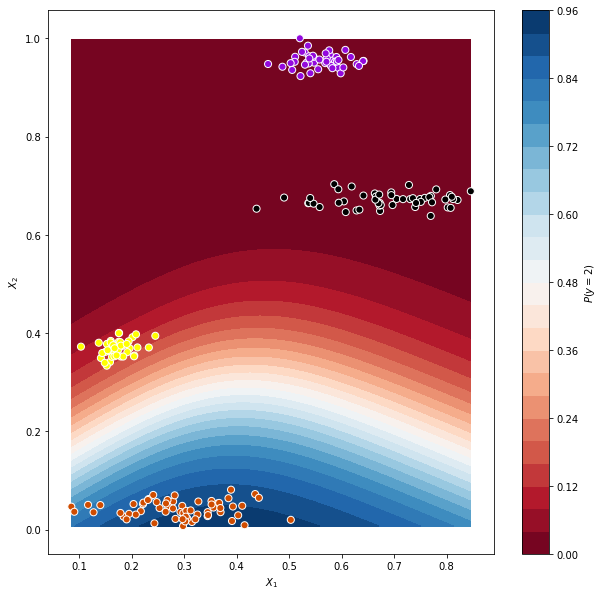

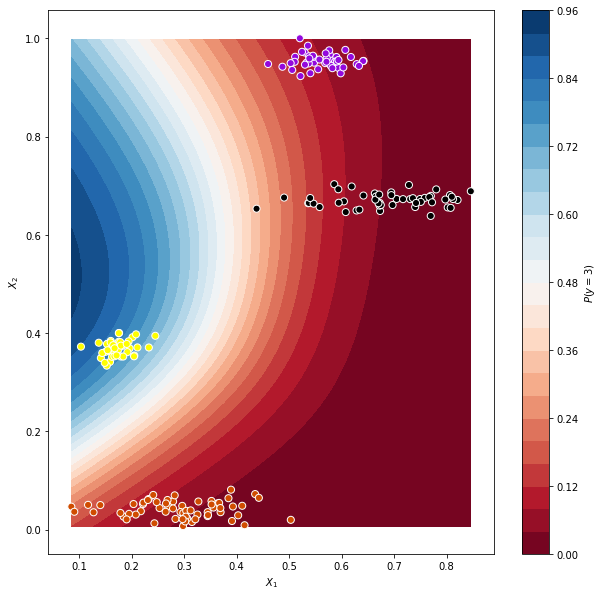

In [449]:
# plot decision boundary for Logistic Regression
Model, kwargs = best_models[0]
model = Model(**kwargs)
model.fit(x_train, y_train)
for cls in range(4):
    plot_decision_boundary(model, x_test, y_test, cls)

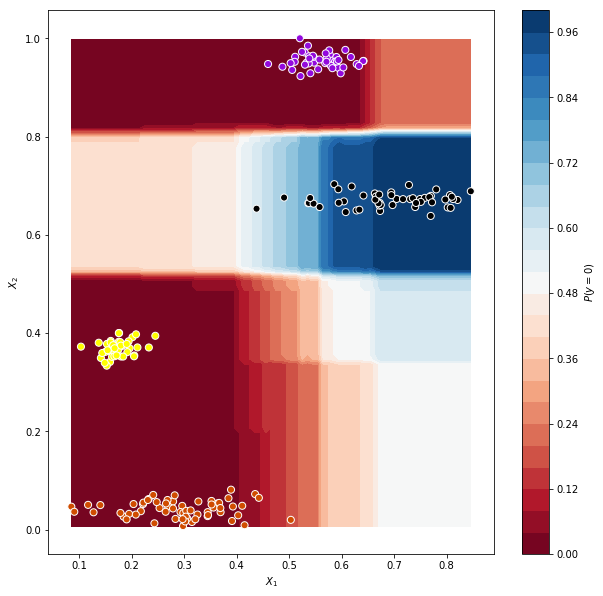

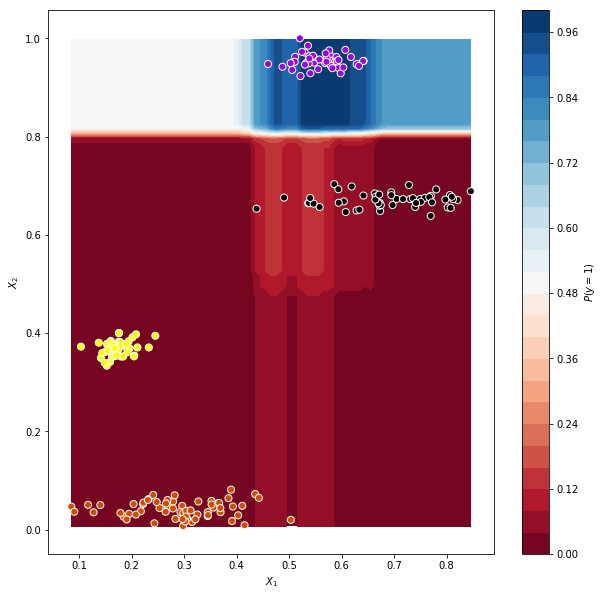

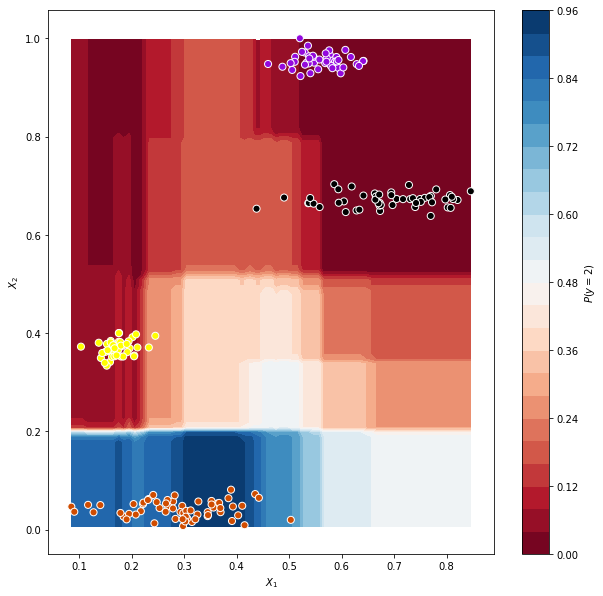

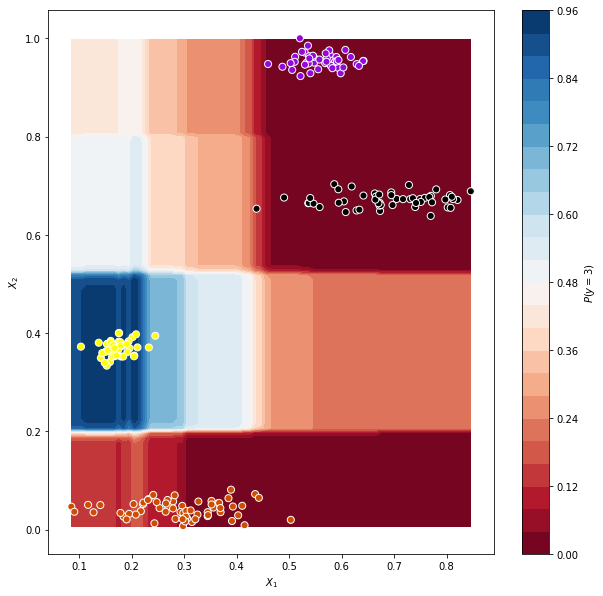

In [450]:
# plot decision boundary for Random Forest
Model, kwargs = best_models[1]
model = Model(**kwargs)
model.fit(x_train, y_train)
for cls in range(4):
    plot_decision_boundary(model, x_test, y_test, cls)

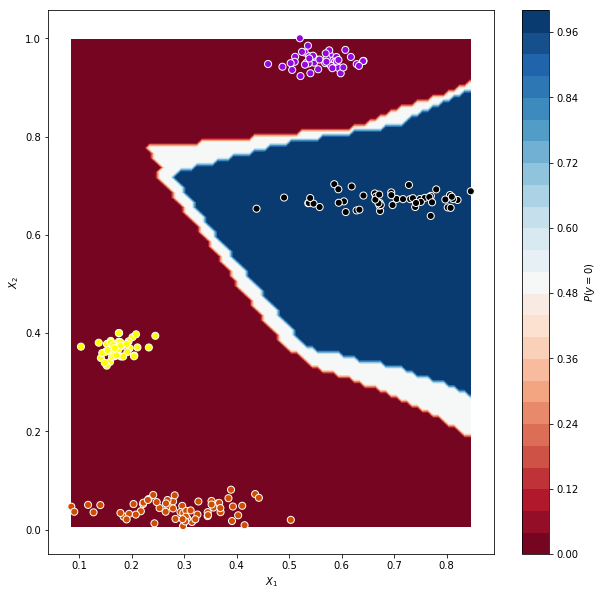

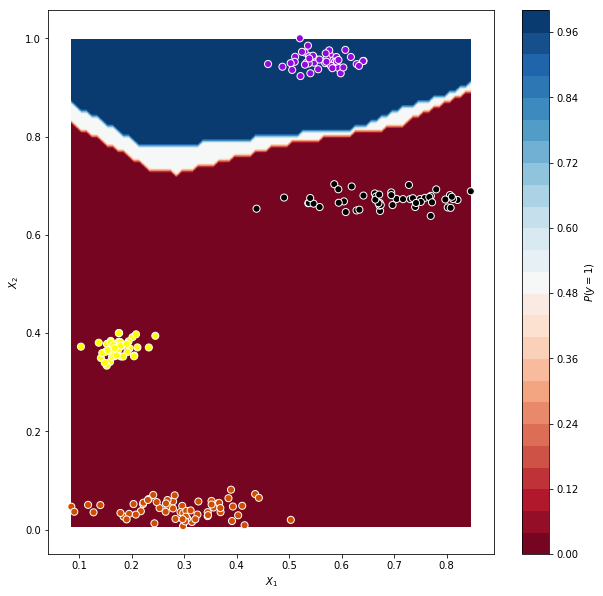

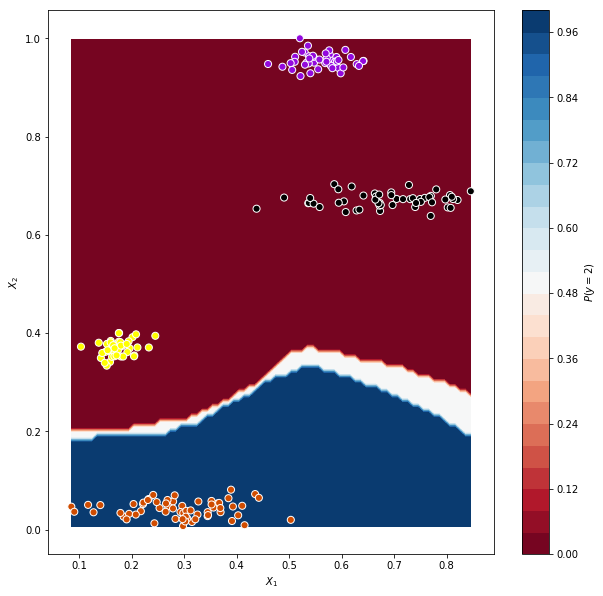

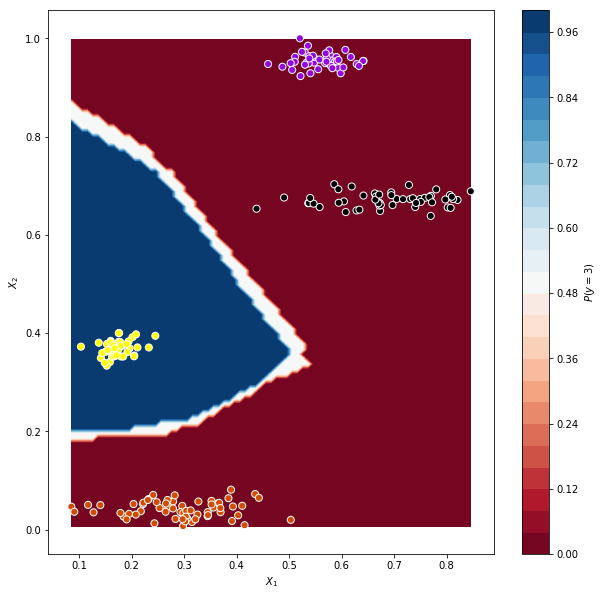

In [451]:
# plot decision boundary for KNN
Model, kwargs = best_models[2]
model = Model(**kwargs)
model.fit(x_train, y_train)
for cls in range(4):
    plot_decision_boundary(model, x_test, y_test, cls)

# Task 2

## Citirea setului de date

In [96]:
dataset = pd.read_csv("Holteiu_N_Daniel_Ninel_train.csv")

Se renunta la coloana "Breed Name" intrucat nu poate fi folosita pentru antrenare (conform cerintelor).

Se renunta la coloana "Owner Name" intrucat rezultatele nu depind de acesta.

In [97]:
modified_dataset = dataset
# getting rid of Breed Name column 
modified_dataset = modified_dataset.drop('Breed Name', axis=1)
# Also getting rid of Owner Name (makes no sense for us) - Results don't depend on Owner Name
modified_dataset = modified_dataset.drop('Owner Name', axis=1)

## Renuntarea la datele ce contin valori nule

In [98]:
# Handling Missing Data
print(modified_dataset.isnull().sum())

Weight(g)            0
Height(cm)         196
Longevity(yrs)       0
Energy level         0
Attention Needs      0
Coat Lenght          0
Sex                  0
dtype: int64


In [99]:
modified_dataset = modified_dataset.dropna() # drop missing data
modified_dataset = modified_dataset.reset_index(drop=True)

## Categorical Data

In cazul task-ului 2 (Regression), pe setul de date, s-a observat ca cea mai buna abordare pentru categorical data este de a le encoda sub forma one hot.

Exemplu:
Coloana Energy level: low, med, high -> Se va transforma in 3 coloane: Energy Level_low, Energy Level_med, Energy Level_high care vor avea valori fie 0 fie 1 si doar una din ele va avea valoare 1.

Acesta encodare s-a realizat pentru coloanele: Energy Level, Attention Needs, Coat Lenght, Sex.

In [100]:
# Handling Categorical Data
# The Categorical Data is handled using One Hot Encoder.
# First LabelEncoder (to change from String (categorical) data to number values)
categorical_columns = ["Energy level", "Attention Needs", "Coat Lenght", "Sex"]
for column in categorical_columns:
    label_encoder = LabelEncoder()
    unique_columns = set(dataset[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    modified_dataset[column + "_encoded"] = label_encoder.fit_transform(modified_dataset[column])
    modified_dataset = modified_dataset.drop(column, axis=1) # drop the old collumns

In [101]:
# Handling Categorical Data - continuation
# The Categorical Data is handled using One Hot Encoder.
categorical_columns = ["Energy level", "Attention Needs", "Coat Lenght", "Sex"]
for column in categorical_columns:
    ohe_encoder = OneHotEncoder()
    unique_columns = set(dataset[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    aux = ohe_encoder.fit_transform(modified_dataset[column + "_encoded"].values.reshape(-1, 1)).toarray()
    aux = pd.DataFrame(aux, columns=[column + "_" + unique_columns.get(i) for i in range(aux.shape[1])])
    modified_dataset = pd.concat([modified_dataset, aux], axis=1) # concatenate the new columns to old dataset
    modified_dataset = modified_dataset.drop(column + "_encoded", axis=1) # get rid of old columns

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique 

## Normalization

S-a folosit Min Max Normalizer pentru normalizarea coloanelor "Weight(g)" si "Height(cm)" in intervalul [0, 1].

In [102]:
# Normalization (Just for Weight(g) and Height(cm)). I am using Min Max Normalizer
# (X - min(X)) / (max(X) - min(X))
modified_dataset["Weight(g)"] = (modified_dataset["Weight(g)"] - modified_dataset["Weight(g)"].min()) / (modified_dataset["Weight(g)"].max() - modified_dataset["Weight(g)"].min())
modified_dataset["Height(cm)"] = (modified_dataset["Height(cm)"] - modified_dataset["Height(cm)"].min()) / (modified_dataset["Height(cm)"].max() - modified_dataset["Height(cm)"].min())

S-a folosit Min Max Normalizer pentru normalizarea coloanei de output "Longevity(yrs)" in intervalul [0, 1].

In [103]:
modified_dataset["Longevity(yrs)"] = (modified_dataset["Longevity(yrs)"] - modified_dataset["Longevity(yrs)"].min()) / (modified_dataset["Longevity(yrs)"].max() - modified_dataset["Longevity(yrs)"].min())

In [104]:
modified_dataset

,Weight(g),Height(cm),Longevity(yrs),Energy level_high,Energy level_low,Energy level_med,Attention Needs_high,Attention Needs_low,Attention Needs_med,Coat Lenght_short,Coat Lenght_med,Coat Lenght_long,Sex_male,Sex_female
0,0.759598,0.684992,0.570458,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.529946,0.971062,0.175866,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.726555,0.664498,0.694545,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.209950,0.017728,0.738707,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.563290,0.964327,0.195855,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.594318,0.945845,0.596441,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.184831,0.356951,0.705995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,0.398879,0.035995,0.695020,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,0.772379,0.677252,0.627343,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,0.503069,0.949383,0.193265,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Data Split

Impartirea setului de date in:
    
X -> Features

y -> "Labels"

In [105]:
y = modified_dataset["Longevity(yrs)"]
X = modified_dataset.drop('Longevity(yrs)', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y)

## Vizualizarea Datelor

In plot-urile de mai jos se poate observa dependenta longevitatii fata de cele doua feature-uri continue ("Weight(g)" si "Height(cm)")

[0, 150, -1, 2]

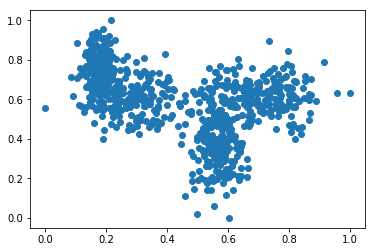

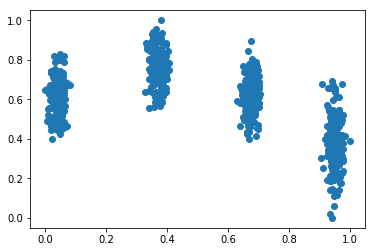

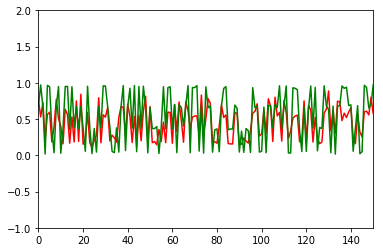

In [106]:
plt.figure()
plt.plot(X["Weight(g)"], y, "o")
plt.figure()
plt.plot(X["Height(cm)"], y, "o")
plt.figure()
plt.plot(X["Weight(g)"], 'r')
plt.plot(X["Height(cm)"], "g")
plt.axis([0, 150, -1, 2])

# Grid Search Cross Validation

Mai jos se foloseste Grid Search Cross Validation cu un set de parametrii pentru a decide care din combinatii are cel mai bun scor. Metoda de scoring este "neg_mean_squared_error" care intoarce "regression loss-ul"

In [107]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [130]:
model = LinearRegression()
params = {}
reg = GridSearchCV(model, params, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
reg.fit(X, y)
results = reg.cv_results_
for res in results:
    print(str(res) + " -- " + str(results[res]))

mean_fit_time -- [0.00227079]
std_fit_time -- [0.00034472]
mean_score_time -- [0.00079446]
std_score_time -- [0.00013744]
params -- [{}]
split0_test_score -- [-0.015729]
split1_test_score -- [-0.01515403]
split2_test_score -- [-0.02020897]
split3_test_score -- [-0.01829002]
split4_test_score -- [-0.0168671]
mean_test_score -- [-0.0172503]
std_test_score -- [0.00182812]
rank_test_score -- [1]
split0_train_score -- [-0.01676234]
split1_train_score -- [-0.01692987]
split2_train_score -- [-0.01578796]
split3_train_score -- [-0.01649844]
split4_train_score -- [-0.01648828]
mean_train_score -- [-0.01649338]
std_train_score -- [0.00039001]


In [131]:
model = Ridge()
params = {"alpha": [0.1, 0.2, 0.4, 0.8, 1.0],
          "tol": [0.0001, 0.001, 0.01, 0.1, 1.0],
          "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]}
reg = GridSearchCV(model, params, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
reg.fit(X, y)
results = reg.cv_results_
nr_elems = len(results["mean_fit_time"])
print("Max test score:", max(results["mean_test_score"]))
print("Max train score:", max(results["mean_train_score"]))
print("Min test score:", min(results["mean_test_score"]))
print("Min train score:", min(results["mean_train_score"]))
print("--------------------------------------------------------------------------")
for i in range(nr_elems):
    for res in results:
        print(str(res) + " -- " + str(results[res][i]))
    print("--------------------------------------------------------------------------")

Max test score: -0.01704143695238928
Max train score: -0.01647927845203188
Min test score: -0.03060759297276932
Min train score: -0.03176449063679647
--------------------------------------------------------------------------
mean_fit_time -- 0.0024164676666259765
std_fit_time -- 0.0004379593057809973
mean_score_time -- 0.0007837772369384766
std_score_time -- 7.212666028909867e-05
param_alpha -- 0.1
param_solver -- auto
param_tol -- 0.0001
params -- {'alpha': 0.1, 'solver': 'auto', 'tol': 0.0001}
split0_test_score -- -0.015734855504628168
split1_test_score -- -0.015145739415210111
split2_test_score -- -0.020099547846364883
split3_test_score -- -0.01758083088380134
split4_test_score -- -0.016870617840438907
mean_test_score -- -0.017086586582239986
std_test_score -- 0.0017309673983083433
rank_test_score -- 104
split0_train_score -- -0.016762458713217385
split1_train_score -- -0.01692817914357331
split2_train_score -- -0.015773007669195524
split3_train_score -- -0.016443324082958805
split4

split1_test_score -- -0.015156720114245686
split2_test_score -- -0.020086106624773867
split3_test_score -- -0.01752720646113528
split4_test_score -- -0.01688523058474741
mean_test_score -- -0.017081874607051763
std_test_score -- 0.0017177259015696603
rank_test_score -- 54
split0_train_score -- -0.016764088986793026
split1_train_score -- -0.016929742104420317
split2_train_score -- -0.0157749516649797
split3_train_score -- -0.01644585345816655
split4_train_score -- -0.01649112683114928
mean_train_score -- -0.016481152609101775
std_train_score -- 0.00039531021180139105
--------------------------------------------------------------------------
mean_fit_time -- 0.0017846107482910156
std_fit_time -- 0.00012249977220175516
mean_score_time -- 0.0005062103271484375
std_score_time -- 3.455487250981555e-05
param_alpha -- 0.4
param_solver -- sparse_cg
param_tol -- 0.001
params -- {'alpha': 0.4, 'solver': 'sparse_cg', 'tol': 0.001}
split0_test_score -- -0.015754660861042276
split1_test_score -- -0.

param_alpha -- 1.0
param_solver -- saga
param_tol -- 0.01
params -- {'alpha': 1.0, 'solver': 'saga', 'tol': 0.01}
split0_test_score -- -0.01579746518143278
split1_test_score -- -0.015147734471634979
split2_test_score -- -0.020070563514757132
split3_test_score -- -0.017450592578222485
split4_test_score -- -0.016923592824975603
mean_test_score -- -0.01707818175013647
std_test_score -- 0.0017030363393922005
rank_test_score -- 5
split0_train_score -- -0.016772402926115718
split1_train_score -- -0.01693882356050904
split2_train_score -- -0.01578495424422645
split3_train_score -- -0.01645842366870226
split4_train_score -- -0.016500621927742737
mean_train_score -- -0.01649104526545924
std_train_score -- 0.0003948133599636227
--------------------------------------------------------------------------
mean_fit_time -- 0.0018413543701171875
std_fit_time -- 8.600262798163678e-05
mean_score_time -- 0.0005144119262695312
std_score_time -- 3.7300005698258534e-05
param_alpha -- 1.0
param_solver -- sag

In [132]:
model = Lasso()
params = {"alpha": [0.1, 0.2, 0.4, 0.8, 1.0],
          "tol": [0.0001, 0.001, 0.01, 0.1, 1.0],
          "warm_start": [True, False],
          "positive": [True, False],
          "selection": ["cyclic", "random"]}
reg = GridSearchCV(model, params, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
reg.fit(X, y)
results = reg.cv_results_
nr_elems = len(results["mean_fit_time"])
print("Max test score:", max(results["mean_test_score"]))
print("Max train score:", max(results["mean_train_score"]))
print("Min test score:", min(results["mean_test_score"]))
print("Min train score:", min(results["mean_train_score"]))
print("--------------------------------------------------------------------------")
for i in range(nr_elems):
    for res in results:
        print(str(res) + " -- " + str(results[res][i]))
    print("--------------------------------------------------------------------------")

Max test score: -0.030018470427690968
Max train score: -0.029934466544931128
Min test score: -0.030018470427690968
Min train score: -0.029934466544931128
--------------------------------------------------------------------------
mean_fit_time -- 0.001657390594482422
std_fit_time -- 0.00027260111820097096
mean_score_time -- 0.0005637645721435547
std_score_time -- 4.256785963764535e-05
param_alpha -- 0.1
param_positive -- True
param_selection -- cyclic
param_tol -- 0.0001
param_warm_start -- True
params -- {'alpha': 0.1, 'positive': True, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': True}
split0_test_score -- -0.029452079389270153
split1_test_score -- -0.02896837800437912
split2_test_score -- -0.03264528878328128
split3_test_score -- -0.030131934118167378
split4_test_score -- -0.0288876481022048
mean_test_score -- -0.030018470427690968
std_test_score -- 0.0013870333497888047
rank_test_score -- 1
split0_train_score -- -0.030070325754460475
split1_train_score -- -0.03018722135106385

std_score_time -- 9.939052622512197e-06
param_alpha -- 0.2
param_positive -- False
param_selection -- random
param_tol -- 0.01
param_warm_start -- False
params -- {'alpha': 0.2, 'positive': False, 'selection': 'random', 'tol': 0.01, 'warm_start': False}
split0_test_score -- -0.029452079389270153
split1_test_score -- -0.02896837800437912
split2_test_score -- -0.03264528878328128
split3_test_score -- -0.030131934118167378
split4_test_score -- -0.0288876481022048
mean_test_score -- -0.030018470427690968
std_test_score -- 0.0013870333497888047
rank_test_score -- 1
split0_train_score -- -0.030070325754460475
split1_train_score -- -0.030187221351063852
split2_train_score -- -0.029275989862472845
split3_train_score -- -0.02993349730417703
split4_train_score -- -0.03020529845248141
mean_train_score -- -0.029934466544931128
std_train_score -- 0.00034330310798283165
--------------------------------------------------------------------------
mean_fit_time -- 0.0012460708618164062
std_fit_time -- 7

mean_fit_time -- 0.0012015819549560547
std_fit_time -- 2.8943426324167596e-05
mean_score_time -- 0.0004976272583007812
std_score_time -- 3.7161617969607193e-05
param_alpha -- 0.8
param_positive -- False
param_selection -- random
param_tol -- 0.001
param_warm_start -- True
params -- {'alpha': 0.8, 'positive': False, 'selection': 'random', 'tol': 0.001, 'warm_start': True}
split0_test_score -- -0.029452079389270153
split1_test_score -- -0.02896837800437912
split2_test_score -- -0.03264528878328128
split3_test_score -- -0.030131934118167378
split4_test_score -- -0.0288876481022048
mean_test_score -- -0.030018470427690968
std_test_score -- 0.0013870333497888047
rank_test_score -- 1
split0_train_score -- -0.030070325754460475
split1_train_score -- -0.030187221351063852
split2_train_score -- -0.029275989862472845
split3_train_score -- -0.02993349730417703
split4_train_score -- -0.03020529845248141
mean_train_score -- -0.029934466544931128
std_train_score -- 0.00034330310798283165
-----------

In [133]:
model = KNeighborsRegressor()
params = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7],
          "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
reg = GridSearchCV(model, params, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
reg.fit(X, y)
results = reg.cv_results_
nr_elems = len(results["mean_fit_time"])
print("Max test score:", max(results["mean_test_score"]))
print("Max train score:", max(results["mean_train_score"]))
print("Min test score:", min(results["mean_test_score"]))
print("Min train score:", min(results["mean_train_score"]))
print("--------------------------------------------------------------------------")
for i in range(nr_elems):
    for res in results:
        print(str(res) + " -- " + str(results[res][i]))
    print("--------------------------------------------------------------------------")

Max test score: -0.013445497314057718
Max train score: 0.0
Min test score: -0.019134329524905302
Min train score: -0.010351009004653381
--------------------------------------------------------------------------
mean_fit_time -- 0.002178335189819336
std_fit_time -- 0.00014418625297000218
mean_score_time -- 0.0023384571075439455
std_score_time -- 0.00043079125683068706
param_algorithm -- auto
param_n_neighbors -- 1
params -- {'algorithm': 'auto', 'n_neighbors': 1}
split0_test_score -- -0.019240884568250665
split1_test_score -- -0.019721967270330647
split2_test_score -- -0.017138709837772156
split3_test_score -- -0.018212623604227526
split4_test_score -- -0.021371356924064503
mean_test_score -- -0.019134329524905302
std_test_score -- 0.0014265034223734556
rank_test_score -- 25
split0_train_score -- -0.0
split1_train_score -- -0.0
split2_train_score -- -0.0
split3_train_score -- -0.0
split4_train_score -- -0.0
mean_train_score -- 0.0
std_train_score -- 0.0
---------------------------------